## 📌 Project Objective

The goal of this project is to:
- Perform Exploratory Data Analysis (EDA) on the Titanic dataset
- Understand the important factors affecting survival
- Build a simple Machine Learning model to predict survival
- Evaluate the model using accuracy and a confusion matrix

This project is beginner-friendly and focuses on learning the complete data science workflow.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')

## 🔍 Initial Data Inspection

In this step, we examine:
- Number of rows and columns
- Data types of features
- Presence of null values


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 🧹 Handling Missing Values

- Age is filled using median  
- Embarked is filled using mode  
- Cabin is dropped due to excessive missing values


In [6]:
med_age=df.Age.median()
mod_emb=df.Embarked.mode()[0]
df.loc[df.Age.isnull(), 'Age']=med_age
df.loc[df.Embarked.isnull(), 'Embarked']=mod_emb

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
df.drop(columns=['Cabin'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## 🎯 Feature Selection for Machine Learning

We select the following important features:
- Survived (Target)
- Pclass
- Sex
- Age
- Fare


In [10]:
ml_df=pd.DataFrame(data=df, columns=['Survived', 'Pclass', 'Sex', 'Age', 'Fare'])
ml_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


## 🔄 Encoding Categorical Features

Sex is converted into numerical form:
- Male → 0  
- Female → 1


In [11]:
ml_df.loc[ml_df['Sex']=='male', 'Sex']=0
ml_df.loc[ml_df['Sex']=='female', 'Sex']=1
ml_df.head()
        

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


## Input and Output Variables


In [12]:
y=ml_df['Survived']
x=ml_df.drop(columns=['Survived'])
y.shape

(891,)

In [13]:
x.shape

(891, 4)

## Train Test Split (80-20)


In [14]:
from sklearn.model_selection import train_test_split
a=train_test_split(x, y, test_size=0.2, random_state=42)
x_train,x_test=a[0],a[1]
y_train,y_test=a[2],a[3]


In [15]:
print(x_test.shape, x_train.shape, y_train.shape, y_test.shape)

(179, 4) (712, 4) (712,) (179,)


## Logistic Regression Model Training


In [16]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## Prediction on Test Data


In [17]:
y_pred=model.predict(x_test)

## Model Accuracy


In [18]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test, y_pred)
a

0.8044692737430168

## Feature Importance (Coefficients)


In [19]:
weights=model.coef_
c_df=pd.DataFrame(columns=x.columns, data=weights)
c_df

,Pclass,Sex,Age,Fare
0,-0.996382,2.465631,-0.025166,0.001182


## Confusion Matrix


Text(50.722222222222214, 0.5, 'Actual')

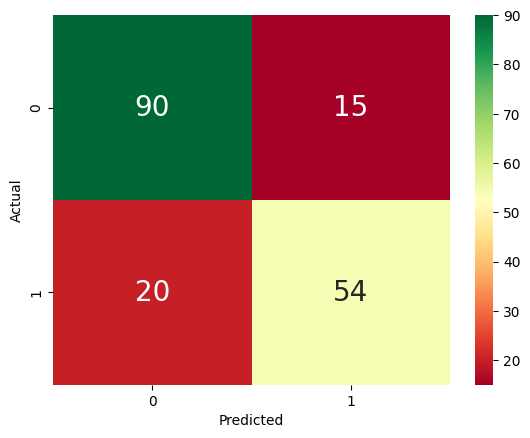

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='RdYlGn', annot=True, annot_kws={'fontsize':20})
plt.xlabel('Predicted')
plt.ylabel('Actual')

* True Negatives (0 → 0): 90 — Correctly predicted non-survivors

* False Positives (0 → 1): 15 — Predicted survived but didn’t

* False Negatives (1 → 0): 20 — Missed actual survivors

* True Positives (1 → 1): 54 — Correctly predicted survivors

The confusion matrix shows that the model correctly predicted 90 non-survivors and 54 survivors. However, it incorrectly classified 15 passengers as survivors when they did not survive, and missed 20 actual survivors. This indicates that the model performs better at predicting non-survival than survival.

## Final Conclusion

- Logistic Regression achieved ~80% accuracy
- Sex is the most influential feature
- Higher class and higher fare increase survival probability
- This is a baseline beginner model
